# Linear Regression model with Gas Consumption Data
## Optimizer : Gradient Descent
- we make linear regression model with Busan city's gas consumption and average tempurature from 2009-01 to 2018-05.
- we will predict Busan city's gas consumption from 2018_06 to 2019-05 by linear regression model.

### 1) import packages

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

### 2) load datasets
- y_train : BUSAN_gas_consumption from 2009-01 to 2018-05 (113 months)
- y_test : BUSAN_gas_consumption from 2017_06 to 2018-05 (12 months)
- https://icim.nims.re.kr/platform/question/16#summary
- temp_orig : BUSAN_average_tempurature from 2009-01 to 2018_12
- https://data.kma.go.kr/stcs/grnd/grndTaList.do?pgmNo=70

In [4]:
train = pd.read_csv("test.csv", encoding="utf-8", index_col=0)
temp_orig = pd.read_csv("ta_20200329144537.csv", encoding = "cp949" , skiprows =7, usecols = ['평균기온(℃)'])

y_train = train.values[:,:]
y_test = train.values[:,-12:]

### 3) Explore datasets

In [6]:
# temp_train : indexing tempurature from 2009-01 to 2018-05 (113 months)
# temp_test : indexing tempurature from 2017_06 to 2018-05 (12 months)
8
temp_train = temp_orig.values[:-7,:].T
temp_test = temp_orig.values[-31:-19,:].T

In [7]:
# explore datasets
print("Shape of y_train :" ,y_train.shape)
print("Shape of y_train :" ,y_test.shape)
print("Shape of temp_train :", temp_train.shape)
print("Shape of temp_test :", temp_test.shape)
print("Type of y_train :" , type(y_train))
print("Type of temp_train :" , type(temp_train))
print("Type of temp_test :" , type(temp_test))

Shape of y_train : (10000, 113)
Shape of y_train : (10000, 12)
Shape of temp_train : (1, 113)
Shape of temp_test : (1, 12)
Type of y_train : <class 'numpy.ndarray'>
Type of temp_train : <class 'numpy.ndarray'>
Type of temp_test : <class 'numpy.ndarray'>


In [8]:
W = np.random.randn(10000,1)*0.01
b = np.zeros((10000,1))

In [9]:
def propagate(W, b, X, Y):

    m = (Y.shape[0]) * (Y.shape[1])

    Z = np.dot(W, X)+ b
    
    cost = mean_squared_error(Y, Z) ** 0.5
    
    # Backward propagation
    dW = (1/m) * (np.dot(X,(Z-Y).T)).T
    db = (1/m) * (np.sum(Z-Y))
    
    grads = {"dW": dW,
             "db": db}
    
    return grads, cost

In [15]:
def optimize(W, b, X, Y, num_iterations, learning_rate, print_cost = False):
    """
    Optimizes W and b by running a Gradient descent
    Input : 
        num_iterations : number of iterations of the optimization loop
        learning_rate -- learning rate of the gradient descent
        print_cost -- True to print the loss every 50 steps
   Returns:
       params -- dictionary containing the weights W and bias b
       grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
       costs -- list of all the costs computed during the optimization -> used to plot
    """
    costs = []
    
    for i in range(num_iterations):

        grads, cost = propagate(W,b,X,Y)

        dW = grads["dW"]
        db = grads["db"]
        
        W = W - (learning_rate) * dW
        b = b - (learning_rate) * db

        # Record the costs for plotting
        if i % 30 == 0:
            costs.append(cost)
            
        # Print the cost every 100 training iterations
        if print_cost and i % 30 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
            
    # plot the cost
    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('iterations (per 100)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    # Lets save the trainded parameters in a variable
    params = {"W": W,
              "b": b}    
    grads = {"dW": dW,
             "db": db}
    
    return params, grads, costs

Cost after iteration 0: 53.646827
Cost after iteration 30: 34.466759
Cost after iteration 60: 31.701525
Cost after iteration 90: 30.545797
Cost after iteration 120: 29.966833
Cost after iteration 150: 29.676730
Cost after iteration 180: 29.532286
Cost after iteration 210: 29.460626
Cost after iteration 240: 29.425139
Cost after iteration 270: 29.407582


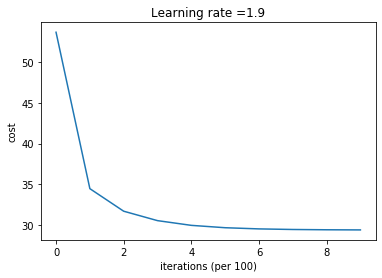

In [16]:
params, grads, costs = optimize(W, b, temp_train, y_train, num_iterations= 300, learning_rate = 1.9, print_cost = True)

In [17]:
W1 = params["W"]
b1 = params["b"]

In [18]:
Y_hat = np.dot(W1,temp_train) + b1

In [19]:
RMSE = mean_squared_error(y_train, Y_hat) ** 0.5
print("RMSE :" , RMSE)

RMSE : 29.398900000942618
